<a href="https://colab.research.google.com/github/mohuzi/CS447Project/blob/master/FashionMNIST_SVM_and_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support


In [2]:
from keras.datasets import fashion_mnist
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

Using TensorFlow backend.


4423680/4422102 [==============================] - 4s 1us/step


In [0]:
# prepare data
X_train = np.reshape(X_train,(48000,28*28))
X_test = np.reshape(X_test,(10000,28*28))
X_val = np.reshape(X_val,(12000,28*28))


### Visualize ( Optional )

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(48000, 28, 28)
(48000,)
(10000, 28, 28)
(10000,)


In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4816, 4813, 4794, 4775, 4783, 4780, 4814, 4844, 4792, 4789]))

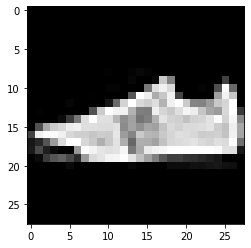

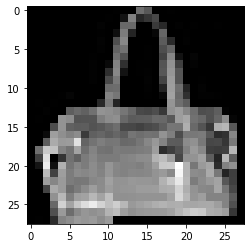

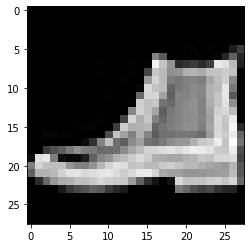

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
plt.imshow(X_train[0],cmap='gray', vmin=0, vmax=255 )
plt.show()
plt.imshow(X_train[1],cmap='gray', vmin=0, vmax=255 )
plt.show()
plt.imshow(X_train[2],cmap='gray', vmin=0, vmax=255 )
plt.show()
 

# **MNIST Naive Bayes**

In [0]:
import sklearn.naive_bayes as nb 

NB_scores = {}

name_model_map = {
    'GaussianNB':nb.GaussianNB(),
    'MultinomialNB':nb.MultinomialNB(),
    'ComplementNB':nb.ComplementNB(),
    'BernoulliNB' :nb.BernoulliNB(), 
    }

for key,model in name_model_map.items():
    result_model = model.fit(X_train, y_train) 
    train_score = model.score(X_train,y_train)
    val_score  = model.score(X_val, y_val)
    y_train_pred = result_model.predict(X_train)
    y_val_pred  = result_model.predict(X_val)
    

    precision_train, recall_train, f1_train, non = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
    precision_val , recall_val , f1_val , non = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')
    print('----------- '+key+' --------------')
    print("train score: ", train_score)
    print("train f1   : ", f1_train)
    print("val socre:  ", val_score)
    print("val f1   :  ", f1_val)

    # save model performence into dict
    NB_scores[key] = (train_score, val_score, f1_train, f1_val)

# transform disc to pd dataframe for easy plot later
NB_scores = pd.DataFrame.from_dict(NB_scores, orient='index', columns=['train_score','val_score', 'train_f1','val_f1'])

----------- GaussianNB --------------
train score:  0.6179583333333334
train f1   :  0.5897532136574457
val socre:   0.6085833333333334
val f1   :   0.5810660269871485
----------- MultinomialNB --------------
train score:  0.6671875
train f1   :  0.638772942184718
val socre:   0.6629166666666667
val f1   :   0.6351465798187856


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------- ComplementNB --------------
train score:  0.6100625
train f1   :  0.5399245384571285
val socre:   0.6056666666666667
val f1   :   0.5354449821161681
----------- BernoulliNB --------------
train score:  0.7167291666666666
train f1   :  0.7059827396893382
val socre:   0.7129166666666666
val f1   :   0.7027046973660382


# **MNIST SVM**

In [0]:
iteration = 1
# prepare data
X_train = X_train / 255
X_test = X_test/ 255
X_val = X_val/ 255

In [5]:
start = time.time()
from sklearn.svm import SVC
model = SVC(C=1, kernel='linear', gamma='auto',max_iter = iteration)
result_model = model.fit(X_train, y_train)
end = time.time()

print("model fitting time:", end-start)

print('################################################')

start = time.time()
train_score = model.score(X_train,y_train)
val_score  = model.score(X_val, y_val)
y_train_pred = result_model.predict(X_train)
y_val_pred  = result_model.predict(X_val)
end = time.time()
print("model evaluate time:", end-start)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


model fitting time: 1.9782111644744873
################################################
model evaluate time: 7.2839674949646


In [7]:
start = time.time()
from sklearn.svm import SVC

SVC_scores = []

SVC_kernels = ['linear', 'poly', 'rbf' ]
C_values = [0.001, 0.01, 0.1, 1, 10, 100 ]

for kernel in SVC_kernels:
    for c in C_values:
        model = SVC(C=c, kernel=kernel, gamma='auto',max_iter = iteration)
        result_model = model.fit(X_train, y_train) 
        train_score = model.score(X_train,y_train)
        val_score  = model.score(X_val, y_val)
        y_train_pred = result_model.predict(X_train)
        y_val_pred  = result_model.predict(X_val) 

        # precision, recall, f1 score
        precision_train, recall_train, f1_train, non = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
        precision_val , recall_val , f1_val , non = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')
        print('----------- '+kernel+" C=" + str(c)+' --------------')
        print("train score: ", train_score)
        print("train f1   : ", f1_train)
        print("val socre:  ", val_score)
        print("val f1   :  ", f1_val)
        
        # save model performence into dict
        SVC_scores.append([kernel,c, train_score, val_score, f1_train, f1_val])


# transform disc to pd dataframe for easy plot later
SVC_scores = pd.DataFrame(SVC_scores, columns=['kernel','C','train_score','val_score', 'train_f1','val_f1'])

end = time.time()

print(end-start)

KeyboardInterrupt: ignored

In [0]:
SVC_scores